In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

#%config InlineBackend.figure_formats = ['svg']

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
plt.rcParams['legend.numpoints'] = 1
from sklearn.model_selection import train_test_split

In [2]:
from seaborn_figure_settings import * 


In [3]:
save_dpath = os.path.join('../notebooks/figures/', 'sup_fig_FL')
os.makedirs(save_dpath,exist_ok=True)

In [4]:
HCOLOR_dark = '#A67B5B'
HCOLOR = '#ECB176'
HCOLOR_light = '#803D3B'

PCOLOR_dark = '#006769'
PCOLOR = '#40A578'
PCOLOR_light = '#9DDE8B'


In [5]:
# fg -> umol 14 (N mulecular weight) * 1e-9 (fmol -> umol)
# switch to C biomass
Qp = 12.5  * 1e-9 / 14
Qh = 40 * 1e-9 / 14

Qp

8.92857142857143e-10

In [6]:
import statsmodels.api as sm

In [7]:
%load_ext autoreload
%autoreload 2
#import CCPA_lib as cp

In [8]:
horder = ['Axenic', 'HOT1A3', 'HP15', 'Pgall', 'CIP', 'DSS-3', 'nitzsch',
       'mit0604', 'k-12', 'HOT5_F3', 'HOT5_C3']


In [9]:
os.listdir('data')

['10cc FACS results.xlsx',
 '10cc FL.xlsx',
 '10cc metadata.xlsx',
 '10cc_FCM_MPN_results.xlsx',
 '10CC_shading_230302025.xlsx',
 'CCPA.pkl.gz',
 'Growth curves A-D Yara.xlsx',
 'Yara_pro99_axenic.xlsx']

In [10]:
#data = pd.read_excel(os.path.join('data', 'Osnat_20CC_het_select.xlsx'), 
#              index_col='date', sheet_name='FL').T.reset_index(drop=True)
data_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='FL0').T.reset_index(drop=True)
data1_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='FL1').T.reset_index(drop=True)
data4_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='FL2').T.reset_index(drop=True)
data5_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='FL3').T.reset_index(drop=True)
data6_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='FL4').T.reset_index(drop=True)
data7_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='FL5').T.reset_index(drop=True)

In [12]:
#data = pd.read_excel(os.path.join('data', 'Osnat_20CC_het_select.xlsx'), 
#              index_col='date', sheet_name='FL').T.reset_index(drop=True)
data2_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='3FL transfer0').T.reset_index(drop=True)

In [13]:
#data = pd.read_excel(os.path.join('data', 'Osnat_20CC_het_select.xlsx'), 
#              index_col='date', sheet_name='FL').T.reset_index(drop=True)
data3_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='3FL transfer 1').T.reset_index(drop=True)

In [14]:
meta_df = pd.read_excel(os.path.join('data', '10cc metadata.xlsx'), 
               sheet_name='metadata') #.T.reset_index(drop=True)
meta2_df = pd.read_excel(os.path.join('data', '10cc metadata.xlsx'), 
               sheet_name='metadata2') #.T.reset_index(drop=True)

In [15]:
 fcm_df = pd.read_excel(os.path.join('data', '10cc FACS results.xlsx'))
 fcm_df

,Unnamed: 0,tube,Sample,id,replicate,transfer,dilution,sybr,problematic,flow,heterotroph,full name,date,transfer day,med4,het,med4 | Count,med4 beads | Count,het | Count
0,0,specimen_1_CC_001+sybr_Tube_002_032.fcs,1A1,1,A,1.0,100.0,sybr,NaN,0.15690,Axenic,Axenic,2021-05-12 11:49:00,19.817361,NaN,NaN,NaN,NaN,NaN
1,1,specimen_1_CC_001+sybr_Tube_003_033.fcs,1B1,1,B,1.0,100.0,sybr,NaN,0.15690,Axenic,Axenic,2021-05-12 11:49:00,19.817361,NaN,NaN,NaN,NaN,NaN
2,2,specimen_1_CC_001+sybr_Tube_004_034.fcs,1C1,1,C,1.0,100.0,sybr,NaN,0.15690,Axenic,Axenic,2021-05-12 11:49:00,19.817361,NaN,NaN,NaN,NaN,NaN
3,4,specimen_1_CC_001+sybr_Tube_006_036.fcs,2B1,2,B,1.0,100.0,sybr,NaN,0.15690,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,NaN,NaN,NaN,NaN,NaN
4,5,specimen_1_CC_001+sybr_Tube_007_037.fcs,2C1,2,C,1.0,100.0,sybr,NaN,0.15690,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,485,specimen_3_CC+sybr_Tube_032_190.fcs,9C5,9,C,5.0,100.0,sybr,NaN,0.12555,k-12,E. coli,2021-08-29 15:49:00,128.984028,NaN,NaN,NaN,NaN,5.0
467,486,specimen_3_CC+sybr_Tube_033_191.fcs,10C5,10,C,5.0,100.0,sybr,NaN,0.12555,HOT5_F3,Marinovum 5F3,2021-08-29 15:49:00,128.984028,NaN,4.488252e+06,NaN,NaN,5635.0
468,487,specimen_3_CC+sybr_Tube_034_192.fcs,11C5,11,C,5.0,100.0,sybr,NaN,0.12555,HOT5_C3,Roseovarius 5C3,2021-08-29 15:49:00,128.984028,NaN,1.673437e+06,NaN,NaN,2101.0
469,488,Mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,37479.0


In [16]:
fcm_df.columns

Index(['Unnamed: 0', 'tube', 'Sample', 'id', 'replicate', 'transfer',
       'dilution', 'sybr', 'problematic', 'flow', 'heterotroph', 'full name',
       'date', 'transfer day', 'med4', 'het', 'med4 | Count',
       'med4 beads | Count', 'het | Count'],
      dtype='object')

In [17]:
fcm_mdf= fcm_df.loc[fcm_df.problematic != 'yes'].melt(
    id_vars=['tube', 'Sample', 'id', 'replicate', 'transfer',
        'heterotroph', 'full name',
       'date', 'transfer day',],
    value_vars=['med4', 'het',],)


In [18]:
fcm_mdf = fcm_mdf.dropna(subset=['value'])

In [19]:
mdf1 = pd.melt(data_df, id_vars='day', var_name='Sample', value_name='FL')
mdf11= pd.melt(data1_df, id_vars='day', var_name='Sample', value_name='FL')
mdf2 = pd.melt(data2_df, id_vars='day', var_name='Sample', value_name='FL')
mdf3 = pd.melt(data3_df, id_vars='day', var_name='Sample', value_name='FL')
mdf4 = pd.melt(data4_df, id_vars='day', var_name='Sample', value_name='FL')
mdf5 = pd.melt(data5_df, id_vars='day', var_name='Sample', value_name='FL')
mdf6 = pd.melt(data6_df, id_vars='day', var_name='Sample', value_name='FL')
mdf7 = pd.melt(data7_df, id_vars='day', var_name='Sample', value_name='FL')


In [20]:
mdf = pd.concat([mdf1, mdf11, mdf2, mdf3, mdf4, mdf5, mdf6, mdf7])

In [21]:
mdf.head()

,day,Sample,FL
0,0.000000,1A0,0.122
1,1.081944,1A0,0.034
2,2.164583,1A0,0.159
3,2.747222,1A0,0.227
4,3.754167,1A0,0.306


In [22]:
mdf['id'] = pd.to_numeric(mdf.Sample.str.slice(start=0, stop=-2))
mdf['replicate'] = mdf.Sample.str.slice(start=-2, stop=-1)
mdf['transfer'] = pd.to_numeric(mdf.Sample.str.slice(start=-1))


In [23]:
mdf = pd.merge(mdf, meta_df, on='id', how='left')
mdf = pd.merge(mdf, meta2_df, on='transfer', how='left')


In [24]:
mdf.columns

Index(['day', 'Sample', 'FL', 'id', 'replicate', 'transfer', 'heterotroph',
       'full name', 'date', 'transfer day'],
      dtype='object')

In [25]:
pmdf = mdf.groupby(['day', 'Sample', 'id', 'replicate', 'transfer', 'transfer day', 'heterotroph',
       'full name'])['FL'].mean().reset_index()

#pmdf['FL'] = pmdf['FL'].clip(lower=0.04)

In [28]:
axenic = ['Axenic']

group1 = ['A. macleodii 1A3', 'Pseudoalteromonas haloplanktis',]

group2 = ['Sulfitobacter pseudonitzschiae','Ruegeria pomeroyi', ]
group3 = [ #'Prochlorococcus mit0604',
  #  'E. coli',
         'Marinovum 5F3','Roseovarius 5C3']
group4 = [ 
       'Marinobacter adhaerens HP15',
       'Phaeobacter gallaeciensis', ]

mdf.loc[mdf['full name'].isin(axenic), 'Group'] = 'Axenic'
mdf.loc[mdf['full name'].isin(group1), 'Group'] = 'Strong'
mdf.loc[mdf['full name'].isin(group2), 'Group'] = 'Sustained'
mdf.loc[mdf['full name'].isin(group3), 'Group'] = 'Weak'
mdf.loc[mdf['full name'].isin(group4), 'Group'] = 'Inhibited'

horder =  group1 + group2 + group3 + group4 + ['Axenic']
# ['Axenic', 'HOT1A3',  'CIP',  'nitzsch', 'mit0604',
#           'DSS-3','k-12','HOT5_F3', 'HOT5_C3'
#           'HP15', 'Pgall',
#          ]
gorder = ['Sustained', 'Strong', 'Weak', 'Inhibited',   'Axenic',  ]
hpalette1 = sns.color_palette("Dark2", n_colors=len(group1)).as_hex() 
hpalette2 = sns.color_palette("terrain", n_colors=len(group2)).as_hex()  
hpalette3 = sns.color_palette("winter", n_colors=len(group3)+1).as_hex()[1:]  
hpalette4 = sns.color_palette("spring", n_colors=len(group4)).as_hex()

transfer_days = [20, 42, 60, 81, 129]
transfer_days = [42, 60, 81, 129]


hpalette =  hpalette1 + hpalette2 + hpalette3 + hpalette4 + ['black']
gpalette = [ hpalette[7], hpalette[1], hpalette[3], hpalette[5], hpalette[8],]
sns.color_palette(hpalette)


[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.3333333333333333, 0.8666666666666667, 0.4666666666666667),
 (0.6666666666666666, 0.5725490196078431, 0.4196078431372549),
 (0.0, 0.5019607843137255, 0.7490196078431373),
 (0.0, 0.7529411764705882, 0.6235294117647059),
 (1.0, 0.3333333333333333, 0.6666666666666666),
 (1.0, 0.6666666666666666, 0.3333333333333333),
 (0.0, 0.0, 0.0)]

In [30]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral',   'Other']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [31]:
horder

['A. macleodii 1A3',
 'Pseudoalteromonas haloplanktis',
 'Sulfitobacter pseudonitzschiae',
 'Ruegeria pomeroyi',
 'Marinovum 5F3',
 'Roseovarius 5C3',
 'Marinobacter adhaerens HP15',
 'Phaeobacter gallaeciensis',
 'Axenic']

In [32]:
# order based on tree order
horder_tree = ['Pseudoalteromonas haloplanktis',
 'Alteromonas macleodii',
 'Marinobacter adhaerens',
 'Phaeobacter gallaeciensis',
 'Ruegeria pomeroyi',
 'Marinovum HOT5_F3',
 'Roseovarius HOT5_C3',
 'Sulfitobacter pseudonitzschiae']

horder_tree = ['Pseudoalteromonas haloplanktis',
 'A. macleodii 1A3',
 'Marinobacter adhaerens HP15',
 'Phaeobacter gallaeciensis',
 'Ruegeria pomeroyi',
 'Marinovum 5F3',
 'Roseovarius 5C3',
 'Sulfitobacter pseudonitzschiae']

gorder_tree = [
'Strong',
 'Strong',
 'Inhibited',
 'Inhibited',
 'Sustained',
 'Weak',
 'Weak',
 'Sustained']
gorder_full = [
'Strong',
 'Strong',
 'Sustained',
 'Sustained',
 'Weak',
 'Weak',
 'Inhibited',
 'Inhibited',
]

gpalette_dict = dict(zip(gorder, gpalette))
hpalette_tree = [gpalette_dict[i] for i in gorder_tree]
hpalette_g = [gpalette_dict[i] for i in gorder_full]
sns.color_palette(hpalette_tree)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.8, 0.4, 0.4666666666666667)]

In [33]:
mdf.loc[mdf.Group.isin(['Axenic'])]

,day,Sample,FL,id,replicate,transfer,heterotroph,full name,date,transfer day,Group
0,0.000000,1A0,0.122,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic
1,1.081944,1A0,0.034,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic
2,2.164583,1A0,0.159,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic
3,2.747222,1A0,0.227,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic
4,3.754167,1A0,0.306,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic
...,...,...,...,...,...,...,...,...,...,...,...
9169,48.937500,1C5,0.005,1,C,5,Axenic,Axenic,2021-08-29 15:49:00,128.984028,Axenic
9170,51.813194,1C5,0.014,1,C,5,Axenic,Axenic,2021-08-29 15:49:00,128.984028,Axenic
9171,52.784028,1C5,0.009,1,C,5,Axenic,Axenic,2021-08-29 15:49:00,128.984028,Axenic
9172,59.947917,1C5,0.029,1,C,5,Axenic,Axenic,2021-08-29 15:49:00,128.984028,Axenic


In [34]:
print('\n'.join(group3 + group4))

Marinovum 5F3
Roseovarius 5C3
Marinobacter adhaerens HP15
Phaeobacter gallaeciensis


In [36]:
mdf['FL_clip'] = mdf['FL'].clip(0.04)
pmdf['FL_clip'] = pmdf['FL'].clip(0.04)


In [37]:
horder_tree

['Pseudoalteromonas haloplanktis',
 'A. macleodii 1A3',
 'Marinobacter adhaerens HP15',
 'Phaeobacter gallaeciensis',
 'Ruegeria pomeroyi',
 'Marinovum 5F3',
 'Roseovarius 5C3',
 'Sulfitobacter pseudonitzschiae']

In [38]:
fcm_mdf.variable.unique()
fcm_mdf.variable = fcm_mdf.variable.map({
    'med4' : 'med4 (FCM)', 
    'het' : 'het (FCM)', 
})

In [39]:
fcm_mdf['Sample'] = fcm_mdf['id'].astype('str') + fcm_mdf['replicate'] + '0'

In [40]:
fcm_mdf.loc[fcm_mdf.variable.isin(['med4 (FCM)']) & ~fcm_mdf.id.isin([8])]

,tube,Sample,id,replicate,transfer,heterotroph,full name,date,transfer day,variable,value
26,specimen_1_CC_001_Tube_002_001.fcs,1A0,1,A,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),9.581642e+06
27,specimen_1_CC_001_Tube_003_002.fcs,1B0,1,B,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),4.938495e+06
28,specimen_1_CC_001_Tube_004_003.fcs,1C0,1,C,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),4.415860e+06
29,specimen_1_CC_001_Tube_005_004.fcs,2A0,2,A,1.0,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,med4 (FCM),4.240275e+07
30,specimen_1_CC_001_Tube_006_005.fcs,2B0,2,B,1.0,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,med4 (FCM),6.931002e+07
...,...,...,...,...,...,...,...,...,...,...,...
314,specimen_3_CC_Tube_028_154.fcs,5C0,5,C,5.0,CIP,Pseudoalteromonas haloplanktis,2021-08-29 15:49:00,128.984028,med4 (FCM),6.403112e+04
315,specimen_3_CC_Tube_029_155.fcs,6C0,6,C,5.0,DSS-3,Ruegeria pomeroyi,2021-08-29 15:49:00,128.984028,med4 (FCM),8.053329e+05
316,specimen_3_CC_Tube_030_156.fcs,7C0,7,C,5.0,nitzsch,Sulfitobacter pseudonitzschiae,2021-08-29 15:49:00,128.984028,med4 (FCM),1.304324e+05
317,specimen_3_CC_Tube_032_157.fcs,9C0,9,C,5.0,k-12,E. coli,2021-08-29 15:49:00,128.984028,med4 (FCM),1.472393e+03


In [42]:
rel_mdf = pmdf.loc[(pmdf.transfer == 0) & (pmdf.id != 8)].copy()

In [49]:
rel_fcmdf = fcm_mdf.loc[fcm_mdf.variable.isin(['med4 (FCM)', 'het (FCM)', ]) & ~fcm_mdf.id.isin([8])].copy()

In [50]:
rel_fcmdf.columns

Index(['tube', 'Sample', 'id', 'replicate', 'transfer', 'heterotroph',
       'full name', 'date', 'transfer day', 'variable', 'value'],
      dtype='object')

In [52]:
rel_fcmdf = rel_fcmdf.pivot(
    index=['Sample', 'id', 'replicate', 'transfer', 'heterotroph',
       'full name', 'date', 'transfer day',],
    columns='variable',
    values='value'
               ).reset_index()

In [53]:
rel_mdf['roundday'] = rel_mdf.day.astype(int)
rel_fcmdf['roundday'] = rel_fcmdf['transfer day'].astype(int)


In [54]:
train_df = pd.merge(rel_fcmdf, rel_mdf, on=['Sample', 'roundday'], how='left' )

In [55]:
train_df.isna().sum()

Sample             0
id_x               0
replicate_x        0
transfer_x         0
heterotroph_x      0
full name_x        0
date               0
transfer day_x     0
het (FCM)         14
med4 (FCM)        31
roundday           0
day                0
id_y               0
replicate_y        0
transfer_y         0
transfer day_y     0
heterotroph_y      0
full name_y        0
FL                 0
FL_clip            0
dtype: int64

In [90]:
# thesesamples stand out (are out of the linear curve)
standout_samples = ['5B0', '5C0', '7C0', '2B0']

In [91]:
train_df.nlargest(5,'het (FCM)')

,Sample,id_x,replicate_x,transfer_x,heterotroph_x,full name_x,date,transfer day_x,het (FCM),med4 (FCM),...,day,id_y,replicate_y,transfer_y,transfer day_y,heterotroph_y,full name_y,FL,FL_clip,LOD
124,7C0,7,C,1.0,nitzsch,Sulfitobacter pseudonitzschiae,2021-05-12 11:49:00,19.817361,3.461714e+08,3.631595e+06,...,19.711111,7,C,0,0.0,nitzsch,Sulfitobacter pseudonitzschiae,0.246667,0.246667,False
60,3B0,3,B,1.0,HP15,Marinobacter adhaerens HP15,2021-05-12 11:49:00,19.817361,2.497425e+08,NaN,...,19.711111,3,B,0,0.0,HP15,Marinobacter adhaerens HP15,0.069000,0.069000,False
65,3C0,3,C,1.0,HP15,Marinobacter adhaerens HP15,2021-05-12 11:49:00,19.817361,2.414352e+08,NaN,...,19.711111,3,C,0,0.0,HP15,Marinobacter adhaerens HP15,0.077000,0.077000,False
66,3C0,3,C,2.0,HP15,Marinobacter adhaerens HP15,2021-06-03 12:27:00,41.843750,1.700211e+08,NaN,...,41.834722,3,C,0,0.0,HP15,Marinobacter adhaerens HP15,0.072000,0.072000,False
121,7B0,7,B,3.0,nitzsch,Sulfitobacter pseudonitzschiae,2021-06-21 14:22:00,59.923611,1.603672e+08,1.292825e+06,...,59.911806,7,B,0,0.0,nitzsch,Sulfitobacter pseudonitzschiae,0.149000,0.149000,False


In [92]:
train_df.nlargest(5,'FL')

,Sample,id_x,replicate_x,transfer_x,heterotroph_x,full name_x,date,transfer day_x,het (FCM),med4 (FCM),...,day,id_y,replicate_y,transfer_y,transfer day_y,heterotroph_y,full name_y,FL,FL_clip,LOD
90,5B0,5,B,1.0,CIP,Pseudoalteromonas haloplanktis,2021-05-12 11:49:00,19.817361,5.133843e+07,5.408867e+07,...,19.711111,5,B,0,0.0,CIP,Pseudoalteromonas haloplanktis,3.461667,3.461667,False
45,2B0,2,B,1.0,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,9.788082e+07,6.931002e+07,...,19.711111,2,B,0,0.0,HOT1A3,A. macleodii 1A3,2.660667,2.660667,False
95,5C0,5,C,1.0,CIP,Pseudoalteromonas haloplanktis,2021-05-12 11:49:00,19.817361,1.376131e+08,1.478021e+08,...,19.711111,5,C,0,0.0,CIP,Pseudoalteromonas haloplanktis,2.553333,2.553333,False
46,2B0,2,B,2.0,HOT1A3,A. macleodii 1A3,2021-06-03 12:27:00,41.843750,8.993668e+07,2.336936e+07,...,41.834722,2,B,0,0.0,HOT1A3,A. macleodii 1A3,1.564000,1.564000,False
50,2C0,2,C,1.0,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,6.531230e+07,2.901717e+07,...,19.711111,2,C,0,0.0,HOT1A3,A. macleodii 1A3,1.476667,1.476667,False


In [93]:
train_df['LOD'] = train_df.FL <= 0.04

In [94]:
train_df.loc[train_df.Sample.isin([i]) & train_df.transfer_x.isin([1.0])].squeeze()

Sample                            2B0
id_x                                2
replicate_x                         B
transfer_x                        1.0
heterotroph_x                  HOT1A3
full name_x          A. macleodii 1A3
date              2021-05-12 11:49:00
transfer day_x              19.817361
het (FCM)             97880815.806246
med4 (FCM)            69310021.854511
roundday                           19
day                         19.711111
id_y                                2
replicate_y                         B
transfer_y                          0
transfer day_y                    0.0
heterotroph_y                  HOT1A3
full name_y          A. macleodii 1A3
FL                           2.660667
FL_clip                      2.660667
LOD                             False
Name: 45, dtype: object

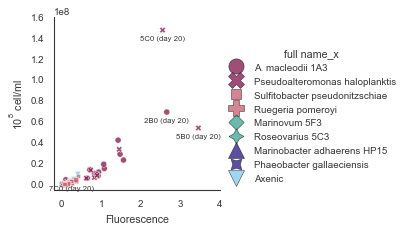

In [95]:
sns.set_context('paper')
g = sns.relplot(data=train_df.loc[train_df['full name_x'].isin(horder)] , 
                x='FL', y='med4 (FCM)', #s=100, 
           height=3,
            s=30, alpha=0.8, lw=0.5, aspect=1.1,
            hue='full name_x', hue_order=horder, palette=hpalette_g + [gpalette_dict['Neutral']],
    style='full name_x', style_order=horder,
            # s=100, alpha=0.7, lw=0.5,
            # hue='Group', hue_order=gorder[:-2], palette=gpalette[:-2],
                #legend=False,
          )

for i in standout_samples:
    row = train_df.loc[train_df.Sample.isin([i]) & train_df.transfer_x.isin([1.0])].squeeze()
    plt.annotate(
        f'{i} (day 20)',
        (row['FL'], row['med4 (FCM)']), 
        xytext=(0, -7),  # 4 points vertical offset.
        textcoords='offset points',
        ha='center', va='center', fontsize=7,)    
#sns.lineplot(data=train_df, x='FL', y='predicted', color='black', ls='--', legend=False)
g.set(xticks=[0,1,2,3,4],
      ylim=(-5e6,1.6e8), xlim=(-0.2,4), xlabel='Fluorescence', ylabel='$\mathregular{10^8}$ cell/ml')
#plt.legend( numpoints = 1 )
#sns.despine(bottom=True, left=True)
#plt.xscale('log')
#plt.yscale('log')
save_fpath = os.path.join(save_dpath, 'fig_FL_FL_vs_FCM.svg')
plt.savefig(save_fpath, format='svg', dpi=1200)

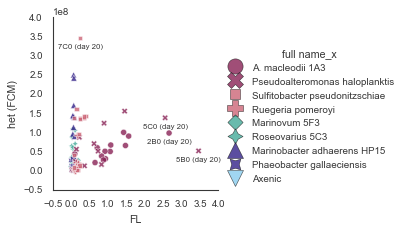

In [96]:
sns.set_context('paper')
g = sns.relplot(data=train_df.loc[train_df['full name_x'].isin(horder)] , 
                x='FL', y='het (FCM)', #s=100, 
           height=3,
            s=30, alpha=0.8, lw=0.5, aspect=1.1,
            hue='full name_x', hue_order=horder, palette=hpalette_g + [gpalette_dict['Neutral']],
    style='full name_x', style_order=horder,
            # s=100, alpha=0.7, lw=0.5,
            # hue='Group', hue_order=gorder[:-2], palette=gpalette[:-2],
                #legend=False,
          )
for i in standout_samples:
    row = train_df.loc[train_df.Sample.isin([i]) & train_df.transfer_x.isin([1.0])].squeeze()
    plt.annotate(
        f'{i} (day 20)',
        (row['FL'], row['het (FCM)']), 
        xytext=(0, -7),  # 4 points vertical offset.
        textcoords='offset points',
        ha='center', va='center', fontsize=7,)    

#sns.lineplot(data=train_df, x='FL', y='predicted', color='black', ls='--', legend=False)
#g.set(xticks=[0,1,2,3,4],
#      ylim=(-5e6,1.6e8), xlim=(-0.2,4), xlabel='Fluorescence', ylabel='$\mathregular{10^8}$ cell/ml')
#plt.legend( numpoints = 1 )
#sns.despine(bottom=True, left=True)
#plt.xscale('log')
#plt.yscale('log')
save_fpath = os.path.join(save_dpath, 'fig_FL_FL_vs_FCM.svg')
plt.savefig(save_fpath, format='svg', dpi=1200)